<a href="https://colab.research.google.com/github/rkdus5485/study/blob/master/pca_n%3D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:

train=[]
ori_train=[]
for i in range(1,36):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      ori_train.append(a)
      a_1=a.reshape(112*92,)
      train.append(a_1)
      
train=np.asarray(train)
ori_train = np.asarray(ori_train)

In [5]:

test=[]
ori_test=[]
for i in range(36,41):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      ori_test.append(a)
      a_1=a.reshape(112*92,)
      test.append(a_1)
      
test=np.asarray(test)
ori_test = np.asarray(ori_test)

In [6]:
print(train, train.shape)

[[ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 [ 39  44  53 ...  29  26  29]
 ...
 [ 84  96 101 ...  36  57  55]
 [ 91  83  70 ... 171 188 190]
 [ 92  93  96 ... 192 163 157]] (350, 10304)


In [7]:
print(ori_train, ori_train.shape)

[[[ 34  34  33 ...   1   1   1]
  [ 35  30  32 ...  38  47  39]
  [ 34  28  31 ...  55  59  49]
  ...
  [ 30  29  31 ...  35  37  41]
  [ 31  29  32 ...  42  34  39]
  [ 28  33  27 ...  37  40  33]]

 [[ 44  43  32 ...  52  48  52]
  [ 44  38  33 ...  51  51  54]
  [ 41  42  29 ...  50  53  53]
  ...
  [ 39  37  39 ...  41  37  37]
  [ 41  41  38 ...  44  36  32]
  [ 40  36  42 ...  43  43  37]]

 [[ 39  44  53 ...  47  48  47]
  [ 44  44  61 ...  47  45  46]
  [ 59  39  57 ...  46  46  44]
  ...
  [ 49  46  42 ...  30  32  28]
  [ 46  35  34 ...  30  29  27]
  [ 32  37  27 ...  29  26  29]]

 ...

 [[ 84  96 101 ...  91  84  86]
  [ 94  93  93 ...  95  90  83]
  [ 94  96  87 ...  97  95  91]
  ...
  [193 196 202 ...  59  64  69]
  [190 195 199 ...  40  69  58]
  [191 191 197 ...  36  57  55]]

 [[ 91  83  70 ... 162 161 157]
  [ 82  81  72 ... 148 165 162]
  [ 86  74  70 ... 138 164 168]
  ...
  [ 54  50  52 ... 156 181 193]
  [ 52  51  51 ... 165 186 195]
  [ 48  56  45 ... 171 188 1

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=10)

In [10]:
train_reduced = pca.fit_transform(train)
train_reduced.shape

(350, 10)

In [11]:
train_reduced

array([[ 2427.41409879,  1112.86641071,   475.98848762, ...,
         -645.55387571,   452.03099298,  -453.94624824],
       [ 2634.66330691,   616.71918979,   603.01860556, ...,
          344.25949811,   546.41104353,  -886.9760787 ],
       [ 2640.02923478,   562.38156251,   961.61534216, ...,
         -183.47783464,  1251.65886756,  -610.66385966],
       ...,
       [   17.65123005,  -249.18821021, -1390.06075956, ...,
          498.01059663,   706.89036705,   309.31660744],
       [ 1632.86203632,   455.21578904,  -926.16694578, ...,
         1886.95393335,  -351.12022234,    73.49717187],
       [  534.33256069,   918.03091955,  -439.91643444, ...,
          324.16956457,    40.51413031,    33.66741281]])

In [12]:
train_recovered = pca.inverse_transform(train_reduced)

In [13]:
train_recovered

array([[ 57.19329911,  57.56060551,  57.4057337 , ...,  39.24310296,
         41.31139343,  37.97711913],
       [ 49.84935662,  49.92006002,  49.37489637, ...,  47.52808332,
         48.08402836,  45.19825208],
       [ 69.45754713,  69.54731526,  69.37817218, ...,  12.93414812,
         12.10502864,  11.10805925],
       ...,
       [119.01623064, 120.64989816, 120.6589386 , ...,  92.19760254,
         90.4908869 ,  91.20932196],
       [ 88.92522315,  88.78791865,  88.39970114, ..., 108.74635602,
        105.34012296, 103.35495047],
       [111.0250173 , 111.94485304, 112.06077909, ...,  74.22668055,
         74.40149005,  73.5258568 ]])

In [14]:
train_recovered.shape

(350, 10304)

In [15]:
train_eigen = train_recovered.reshape((350,112,92),)

In [16]:
train_eigen

array([[[ 5.71932991e+01,  5.75606055e+01,  5.74057337e+01, ...,
          5.96571202e+01,  5.94356547e+01,  6.04906138e+01],
        [ 5.68046926e+01,  5.79485649e+01,  5.59868060e+01, ...,
          6.14184877e+01,  6.18513031e+01,  6.17176470e+01],
        [ 5.83454012e+01,  5.74139151e+01,  5.75574598e+01, ...,
          6.13573188e+01,  6.25946579e+01,  6.24511286e+01],
        ...,
        [ 2.99727198e+01,  3.26246273e+01,  3.40430819e+01, ...,
          3.51968010e+01,  3.77725534e+01,  3.76300029e+01],
        [ 3.01959053e+01,  3.38102830e+01,  3.26842478e+01, ...,
          3.58427509e+01,  3.69947106e+01,  3.70402415e+01],
        [ 3.20744414e+01,  3.13537920e+01,  3.21420033e+01, ...,
          3.92431030e+01,  4.13113934e+01,  3.79771191e+01]],

       [[ 4.98493566e+01,  4.99200600e+01,  4.93748964e+01, ...,
          6.06044212e+01,  5.98437325e+01,  6.13173381e+01],
        [ 4.91615686e+01,  4.94844901e+01,  4.80735503e+01, ...,
          6.24822812e+01,  6.30472173e

In [17]:
train_eigen.shape

(350, 112, 92)

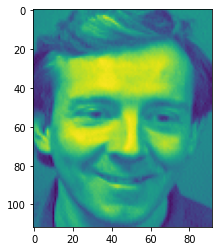

In [18]:
plt.imshow(ori_train[20])

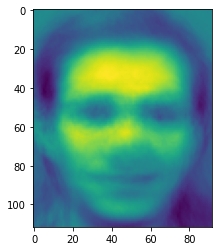

In [19]:
plt.imshow(train_eigen[20])

In [20]:
class PrincipalComponentAnalysis():

    
    def __init__(self, n_components):
        #n_components : 데이터를 축소시킬 목표 차원
        self.n_components = n_components
        
        self.eigen_mat = None
        
        self.eigen_val = None

        self.reduced_eigen_mat = None
        
    def fit(self, x):
        # data를 zero centered
        x = x - np.mean(x, axis=0, keepdims=True)
        
        n, d = x.shape
        
        cov = np.matmul(x.T, x)/n
        
        eigvals, eigvecs = np.linalg.eig(cov)
        
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x):
        
        x = x - np.mean(x, axis=0, keepdims=True)
        
        if self.eigen_mat is None:
            print("You should fit model first!")
            return
        
        
        self.reduced_eigen_mat = self.eigen_mat[:, :self.n_components]
        
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    def reconstruct(self, data, x_transformed) :
        y = np.matmul(x_transformed, self.reduced_eigen_mat.T)+np.mean(data, axis=0, keepdims=True)
        y = y.reshape(y.shape[0],112,92)

        return y

In [21]:
pca = PrincipalComponentAnalysis(n_components=3)

In [22]:
pca.fit(train)

In [23]:
test_transformed = pca.transform(test)
test_transformed

array([[  942.20823801+0.j,  -958.70166748+0.j, -1132.89777499+0.j],
       [ -859.20774626+0.j, -2108.90911647+0.j,  -957.29367174+0.j],
       [  158.25463943+0.j,  -999.11666565+0.j, -1700.22784975+0.j],
       [ -607.98656821+0.j,  -342.60014636+0.j, -1521.25884048+0.j],
       [  126.04403178+0.j,  -645.64086105+0.j, -1351.41434479+0.j],
       [ -856.84022859+0.j,  -301.72302476+0.j, -1767.45419989+0.j],
       [  866.86319995+0.j,  -898.12218704+0.j, -1254.04529125+0.j],
       [ 1040.4227767 +0.j,  -880.06516201+0.j, -1198.23467801+0.j],
       [ -816.59148279+0.j, -1802.92828807+0.j,  -982.69198626+0.j],
       [  761.96011808+0.j,  -678.21265913+0.j, -1386.42158914+0.j],
       [-2523.12328202+0.j,   323.48300502+0.j,   445.06456224+0.j],
       [-1998.85295331+0.j,  2380.02854264+0.j,   237.75663737+0.j],
       [-2464.07688871+0.j,   191.82118684+0.j,   615.95089123+0.j],
       [-2164.50008503+0.j,   235.83348184+0.j,   854.95116192+0.j],
       [-1613.28745195+0.j,  2436.

In [24]:
test_transformed.shape

(50, 3)

In [25]:
pca.reduced_eigen_mat

array([[ 0.00377202+0.j, -0.01684105+0.j,  0.01189938+0.j],
       [ 0.00372183+0.j, -0.01677177+0.j,  0.01201049+0.j],
       [ 0.00378369+0.j, -0.01670947+0.j,  0.01187886+0.j],
       ...,
       [ 0.00647606+0.j,  0.01145642+0.j,  0.01978721+0.j],
       [ 0.00586232+0.j,  0.01017012+0.j,  0.01971873+0.j],
       [ 0.00710824+0.j,  0.00929343+0.j,  0.01999573+0.j]])

In [26]:
pca.reduced_eigen_mat.shape

(10304, 3)

In [27]:
test_reconstruct = pca.reconstruct(test, test_transformed)

In [28]:
test_reconstruct

array([[[ 96.91879695+0.j,  96.23921054+0.j,  97.12689443+0.j, ...,
          94.68996828+0.j,  93.69311079+0.j,  94.14807385+0.j],
        [ 96.70705261+0.j,  97.12812944+0.j,  96.93415542+0.j, ...,
          94.48072717+0.j,  93.82123471+0.j,  94.12063775+0.j],
        [ 96.49489485+0.j,  96.33232764+0.j,  96.99737913+0.j, ...,
          94.14954321+0.j,  94.39694869+0.j,  93.72905869+0.j],
        ...,
        [ 73.43966934+0.j,  75.10173966+0.j,  73.19222897+0.j, ...,
          45.63261514+0.j,  47.01259652+0.j,  44.77705125+0.j],
        [ 76.65390013+0.j,  74.12136799+0.j,  74.81881465+0.j, ...,
          46.82151836+0.j,  48.96065569+0.j,  49.0636507 +0.j],
        [ 77.35803017+0.j,  77.92851189+0.j,  77.42566322+0.j, ...,
          50.50162812+0.j,  51.45410095+0.j,  51.43468704+0.j]],

       [[111.58410894+0.j, 110.93474916+0.j, 111.61622322+0.j, ...,
         110.53477457+0.j, 109.27576068+0.j, 109.65194304+0.j],
        [110.98833082+0.j, 111.78181059+0.j, 110.70695185+0.j

In [29]:
test_reconstruct.shape

(50, 112, 92)

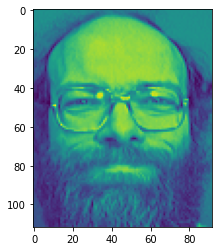

In [30]:
plt.imshow(ori_test[10].astype(np.float32))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


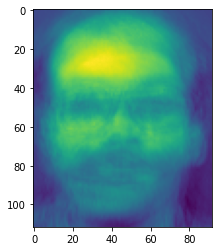

In [31]:
plt.imshow(test_reconstruct[10].astype(np.float32))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


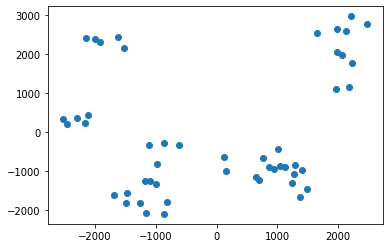

In [32]:
# n_components = 2
plt.scatter(test_transformed[:,0],test_transformed[:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/root/.local/lib/python3.7/site-packages/matplotlib/colors.py:292: ComplexWarning: Casting complex values to real discards the imaginary part
  c = t

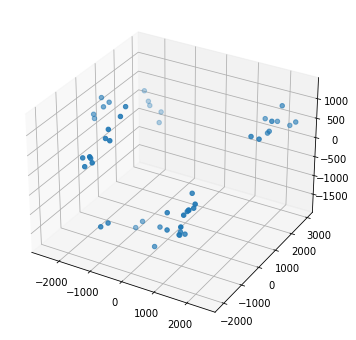

In [33]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
x = test_transformed[:,0]
y = test_transformed[:,1]
z = test_transformed[:,2]
ax.scatter(x,y,z)
plt.show()